In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt

In [ ]:
data_url = 'https://raw.githubusercontent.com/BTanjerine/LoanDataCSV/main/cleaned_loan_data.csv'
data = pd.read_csv(data_url)
data.head()

,Unnamed: 0,loan_status,Principal,terms,past_due_days,age,education,Gender
0,0,1,0.412489,1.080782,-0.63003,-0.686221,2,0
1,1,1,0.164971,1.080782,-0.63003,-0.564047,2,1
2,2,1,-0.082547,-0.551001,-0.63003,-0.502960,0,0
3,3,1,-0.330065,-0.551001,-0.63003,-0.808395,0,1
4,4,1,-0.577583,-0.551001,-0.63003,-0.869482,2,0


In [ ]:
data.shape

(1015, 8)

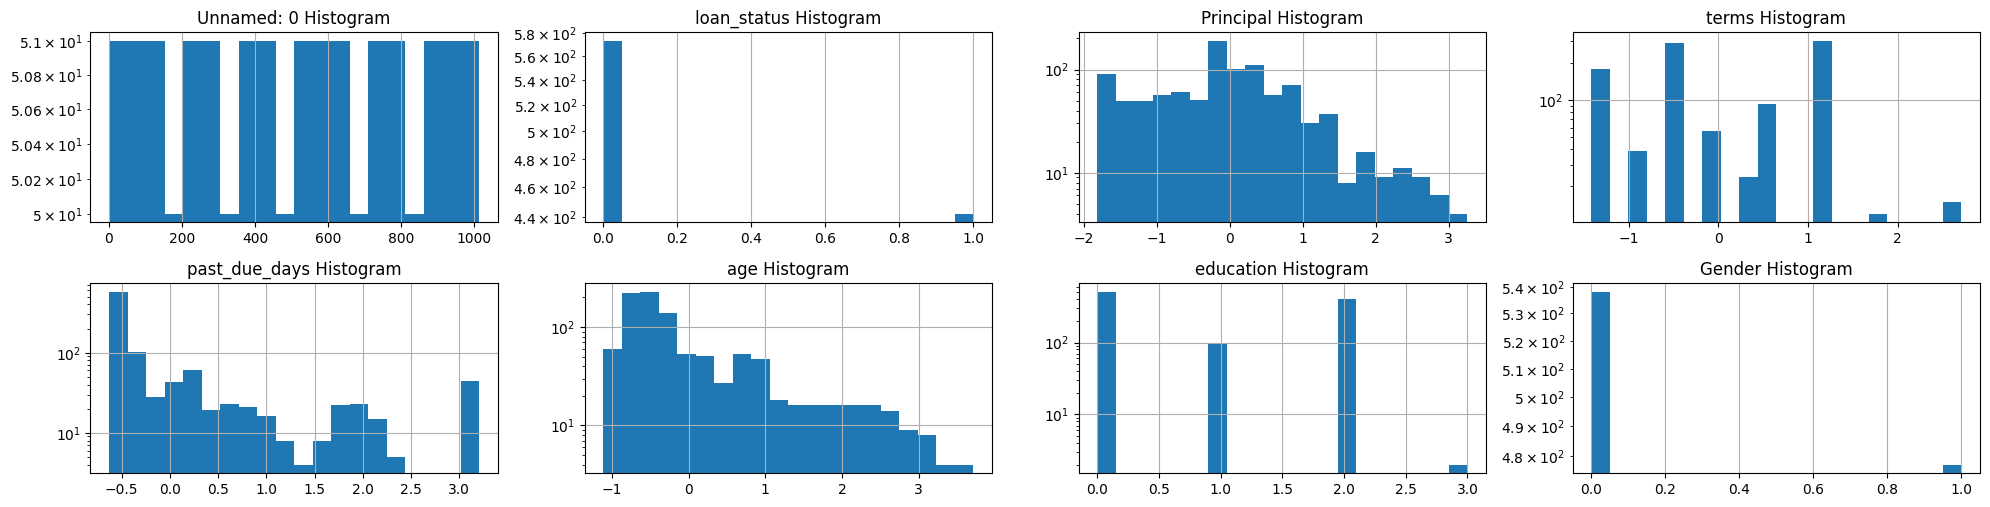

In [ ]:
fig = plt.figure(figsize=(20,20))
for i, feature in enumerate(data.columns):
    f = fig.add_subplot(8, 4, i + 1)
    data[feature].hist(bins = 20, ax = f)
    f.set_title(feature + " Histogram",)
    f.set_yscale('log')
fig.tight_layout()
plt.show()

In [ ]:
# Splitting the data, considers all features for training X
X = data.iloc[:, 2:]
y = data.iloc[:, 1]

In [ ]:
#70%/30% split on data where testing is given 30% split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
#Utilize RandomForestClassifier Model with tuned hyperparameters
rf_model = RandomForestClassifier(n_estimators=1015, bootstrap=True, min_samples_split=300, max_depth=128,
                                  min_samples_leaf=150, random_state=256, max_leaf_nodes=None)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=128, min_samples_leaf=150,
                       min_samples_split=300, n_estimators=1015,
                       random_state=256)

In [ ]:
# Evaluate cross-validation accuracy
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Cross-Validation Accuracy: {:.2f}% (+/- {:.2f}%)".format(cv_scores.mean()
      * 100, cv_scores.std() * 100))

# Evaluate training accuracy
y_pred_train = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on training set: {:.2f}%".format(train_accuracy * 100))

# Evaluate testing accuracy
y_pred_test = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy on testing set: {:.2f}%".format(test_accuracy * 100))

Cross-Validation Accuracy: 95.35% (+/- 1.64%)
Accuracy on training set: 96.20%
Accuracy on testing set: 95.74%


In [ ]:
#Evaluate predicted negatives and positives in matrix for testing set
metrics.confusion_matrix(y_test, y_pred_test)

array([[165,   0],
       [ 13, 127]])

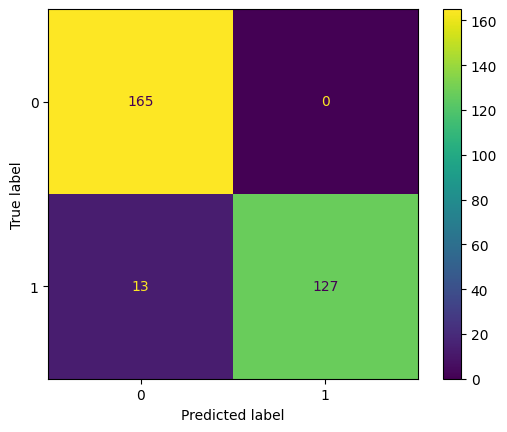

In [ ]:
actual = y_test
predicted = y_pred_test

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [ ]:
# Evaluate the testing report
target_names={'approved for a loan','denied for a loan'}
y_pred = rf_model.predict(X_test)

report = classification_report(y_test, y_pred, target_names=target_names)
print("\nClassification Report for testing set:")
print(report)


Classification Report for testing set:
                     precision    recall  f1-score   support

  denied for a loan       0.93      1.00      0.96       165
approved for a loan       1.00      0.91      0.95       140

           accuracy                           0.96       305
          macro avg       0.96      0.95      0.96       305
       weighted avg       0.96      0.96      0.96       305



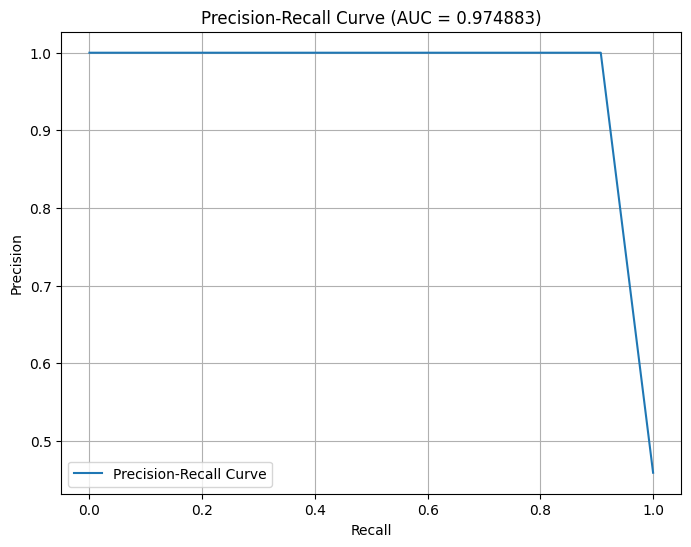

In [ ]:
#Analyzing the Precision Recall Curve, visualizing the confusion matrix
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
auc_score = auc(recall, precision)
plt.title(f'Precision-Recall Curve (AUC = {auc_score:.6f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)
plt.show()